In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import display
from PIL import Image

PATH = '/content/drive/MyDrive/Documents/Colab Notebooks/PythonForFinance/'

ValueError: mount failed

### What is risk?
Variability is the best measure of risk we have. Imagine you invest $1000 in a stock that earns ON AVERAGE 15%/year. How did that 15% come about? Was it:
- +14%, +16%, +13%, +17%
<br><br>OR<br><br>
- +50%, -40%, -40%, +50%
<br><br>
Notice that those both yield an average of 15%, but the way each stock got there was vastly different. In the first case, your money will earn a stable amount over time. In the second, there's large variability from year to year.
<br>
Note: this is the variability of the return. So if the variability is 3%, but the avg rate of return is 15%, then you can expect an actual return of 15% +/- 3% on any given year

### Statistical Measures to Quantify Risk

- Variance (S<sup>2</sup>) - Measures the dispersion of a set of data points around the mean (X bar is the mean) <br>
- Standard Devation (S) - The square root of variance, it measures the average distance of data points from the mean

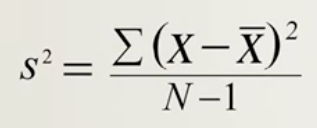

In [ ]:
img = Image.open(PATH + 'assets/variance_equation.png')
display(img)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib as plt

In [ ]:
tickers = ['PG', 'BEI.DE']

security_data = pd.DataFrame()

for t in tickers:
    security_data[t] = yf.download(t, start='2007-1-1', auto_adjust=False)['Adj Close']

security_data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PG,BEI.DE
Date,,
2025-06-24,160.360001,108.099998
2025-06-25,158.970001,106.750000
2025-06-26,158.630005,105.949997
2025-06-27,159.860001,106.900002
2025-06-30,158.434998,106.599998


In [ ]:
# We take the log return because we examine each company separately in the timeframe
# This approach will tell us more about the independant behavior of each stock
security_returns = np.log(security_data / security_data.shift(1))
security_returns

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008625,-0.020772
2007-01-08,0.002202,0.000202
2007-01-09,-0.002517,-0.022858
...,...,...
2025-06-24,-0.004169,0.007894
2025-06-25,-0.008706,-0.012567
2025-06-26,-0.002141,-0.007522


### PG

In [ ]:
print(f"PG average daily return: {security_returns['PG'].mean()}")
print(f"PG average annual return: {security_returns['PG'].mean() * 250}")
print(f"PG daily standard deviation of return: {security_returns['PG'].std()}")
print(f"PG annual standard deviation return: {security_returns['PG'].std() * 250 ** 0.5}")

PG average daily return: 0.0003061622662320392
PG average annual return: 0.0765405665580098
PG daily standard deviation of return: 0.011670609850837838
PG annual standard deviation return: 0.18452854405922758


### Beiersdorf

In [ ]:
print(f'BEI.DE average daily return: {security_returns["BEI.DE"].mean()}')
print(f'BEI.DE average annual return: {security_returns["BEI.DE"].mean() * 250}')
print(f'BEI.DE daily standard deviation of return: {security_returns["BEI.DE"].std()}')
print(f'BEI.DE annual standard deviation return: {security_returns["BEI.DE"].std() * 250 ** 0.5}')

BEI.DE average daily return: 0.0001922140751869782
BEI.DE average annual return: 0.048053518796744556
BEI.DE daily standard deviation of return: 0.013479737494002875
BEI.DE annual standard deviation return: 0.21313336371109692


### Benefits of Portfolio Diversification
There is a relationship between the prices of companies. While share prices are influenced by the state of the economy, the state of the economy impacts different industries in different ways. For instance, during a recession, it's easier to wait for a new car than wait to buy groceries, so Ford might be hit harder than Walmart.

### Measuring the relationship between stocks
Covariance measures the direction and strength of a linear relationship between two variables in their original units<br>
<br>
Correlation coefficient is a standardized version of covariance that scales the value to a range between -1 and +1 (hence the std dev of x and y on the bottom)
<br>


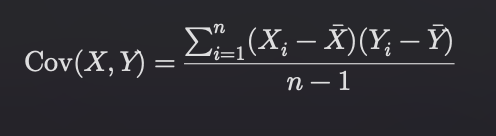

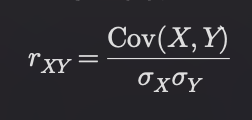

In [ ]:
img = Image.open(PATH + 'assets/covariance.png')
display(img)
img = Image.open(PATH + 'assets/correlation_coefficient.png')
display(img)

A perfect correlation (+1) would imply house prices are directly proportionalte to house size, or that population density is directly proportionate to socioeconomic status, etc. A negative correlation (-1) would imply INVERSE proportionality - i.e house prices go up as the size of the house goes down (yes, that would be weird). No correlation (0) would imply the variables are absolutely independent of each other, such as the price of coffee in brazil vs the price of a house in london.

<br>

A Covariance Matrix is a representation of the way two or more variables relate to each other. The covariance of a variable with itself is just its variance - ie. cov(x,x) = var(x). When looking at a Covariance Matrix, the diagonal line from top-left to bottom-right is just the variances of each variable while all other values are covariances
<br><br>

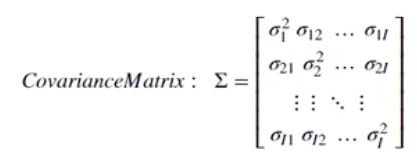

In [ ]:
img = Image.open(PATH + 'assets/covariance_matrix.png')
display(img)

### Calculating Covariance and Correlation

In [ ]:
# THANKFULLY pd.DataFrame.var() GETS THE VARIANCE FOR US! GOD BLESS AMERICA
pg_variance = security_returns['PG'].var()
pg_variance

0.00013620313429047316

In [ ]:
bei_variance = security_returns['BEI.DE'].var()
bei_variance

0.00018170332290722694

In [ ]:
pg_annual_variance = pg_variance * 250
pg_annual_variance

0.03405078357261829

In [ ]:
bei_annual_variance = bei_variance * 250
bei_annual_variance

0.04542583072680673

In [ ]:
# HOLY SHIT! pd.DataFrame.cov() COMPUTES PAIRWISE COVARIANCE OF COLUMNS! WE ARE SO BLESSED
cov_matrix = security_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000136,0.000041
BEI.DE,0.000041,0.000182


In [ ]:
annual_cov_matrix = cov_matrix * 250
annual_cov_matrix

,PG,BEI.DE
PG,0.034051,0.010328
BEI.DE,0.010328,0.045426


Note how the top-left and bottom-right are just the variances since it's the product of PG's cov with PG's cov and the product of Cov(BEI)xCov(BEI) (which are both just equal to Var(PG) and Var(BEI) respectively. Meanwhile the other two cells contain the actual covariance between the variables)

In [ ]:
# AND IF THAT WASN'T ENOUGH, .corr() COMPUTES PAIRWISE CORRELATIONS OF COLUMNS
corr_matrix = security_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.262063
BEI.DE,0.262063,1.000000


Note that the correlation matrix shown above displays the correlation between the two asset's RETURNS not their PRICES. The difference between the two is:
- corr(prices): focuses on stock price levels
- corr(returns) {aka the correlation of the RATES of returns}: reflects the dependence between prices at different times and focuses on the returns of your portfolio

<br>

Also: don't annualize the correlation table as it does not contain avg daily values, but rather the relationship between the two variables

### Portfolio Variance (The risk of multiple securities)
Remember from algebra that: (a + b)<sup>2</sup> = a<sup>2</sup> + 2ab + b<sup>2</sup>
<br><br>
Well, calculating portfolio variance (with 2 stocks) is similar. Where w's are the weights of each stock (ie. .5 and .5 if you have the same amount invested in the 1st stock as the 2nd, or perhaps .7 and .3), which always add up to 1, and the sigmas are the std dev of each stock:
<br>




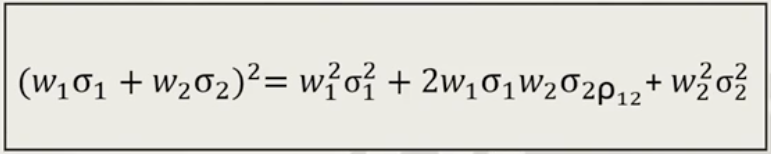

In [ ]:
img = Image.open(PATH + 'assets/portfolio_variance.png')
display(img)

### Calculating Portfolio Risk

In [ ]:
weights = np.array([0.5, 0.5]) # Representing an evenly weighted portfolio

In [ ]:
portfolio_variance = np.dot(weights.T, np.dot(security_returns.cov() * 250, weights))
portfolio_variance

np.float64(0.025032989169430298)

In [ ]:
portfolio_volatility = portfolio_variance ** 0.5
portfolio_volatility

np.float64(0.15821816953002046)

In [ ]:
# aka
print(str(round(portfolio_volatility, 5) * 100) + '%')

15.822%


### The 2 Types of Investment Risk
- Undiversifiable (Systematic) risk : This component depends on the variance of each individual security
    - portfolio_variance - diversifiable_risk = sum(weighted variances)
    - ie. no matter how many diverse assets you contain, you will never get rid of this kind of risk
    - This is caused by things that affect whole markets like:
        - Economic recession
        - Low consumer spending
        - Wars
        - Forces of nature
        - Etc
- Diversifiable (Idiosyncratic) risk: This component depends on risk driven by company-specific events
    - portfolio_variance - weighted annual variances
    - Diversifiable risk can be eliminated if we invest in non-correlated assets
        - ie. having assets in:
            - Automotive
            - Construction
            - Energy
            - Technology
            - Etc


This is why investment vehicles tracking indices like the S&P500 are well diversified

### Calculating Diversifiable and Nondiversifiable Risk of a Portfolio

In [ ]:
# Diversifiable Risk:
print(weights)
print(pg_annual_variance)
print(bei_annual_variance)

diversifiable_risk = portfolio_variance - (weights[0] ** 2 * pg_annual_variance) - (weights[1] ** 2 * bei_annual_variance)
diversifiable_risk

[0.5 0.5]
0.03405078357261829
0.04542583072680673


np.float64(0.005163835594574043)

In [ ]:
print(str(round(diversifiable_risk*100, 3)) + ' %')

0.516 %


In [ ]:
# Non-diversifiable Risk:
non_diversifiable_risk_1 = portfolio_variance - diversifiable_risk
non_diversifiable_risk_1

np.float64(0.019869153574856253)

In [ ]:
non_diversifiable_risk_2 = (weights[0] ** 2 * pg_annual_variance) + (weights[1] ** 2 * bei_annual_variance)
non_diversifiable_risk_2

np.float64(0.019869153574856253)

In [ ]:
non_diversifiable_risk_1 == non_diversifiable_risk_2

np.True_